In [1]:
import numpy as np # 导入Numpy
import pandas as pd # 导入Pandas
import os # 导入OS
import cv2 # 导入Open CV工具箱

print(os.listdir('../input/flowers-recognition/flowers')) #打印目录结构
daisy_dir='../input/flowers-recognition/flowers/daisy' #雏菊目录
rose_dir='../input/flowers-recognition/flowers/rose' #玫瑰目录
sunflower_dir='../input/flowers-recognition/flowers/sunflower' #向日葵目录
tulip_dir='../input/flowers-recognition/flowers/tulip' #郁金香目录

X = [] #初始化
y_label = [] #初始化
imgsize = 150 #图片大小
# 定义一个函数读入花的图片
def training_data(label,data_dir):
    print ("正在读入：", data_dir) 
    for img in os.listdir(data_dir): #目录
        path = os.path.join(data_dir,img) #目录+文件名
        img = cv2.imread(path,cv2.IMREAD_COLOR) #读入图片
        img = cv2.resize(img,(imgsize,imgsize)) #设定图片像素维度
        X.append(np.array(img)) #X特征集
        y_label.append(str(label)) #y标签，即花的类别
# 读入目录中的图片
training_data('daisy',daisy_dir) #读入雏菊
training_data('rose',rose_dir) #读入玫瑰
training_data('sunflower',sunflower_dir) #读入向日葵
training_data('tulip',tulip_dir) #读入郁金香

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
正在读入： ../input/flowers-recognition/flowers/daisy
正在读入： ../input/flowers-recognition/flowers/rose
正在读入： ../input/flowers-recognition/flowers/sunflower
正在读入： ../input/flowers-recognition/flowers/tulip


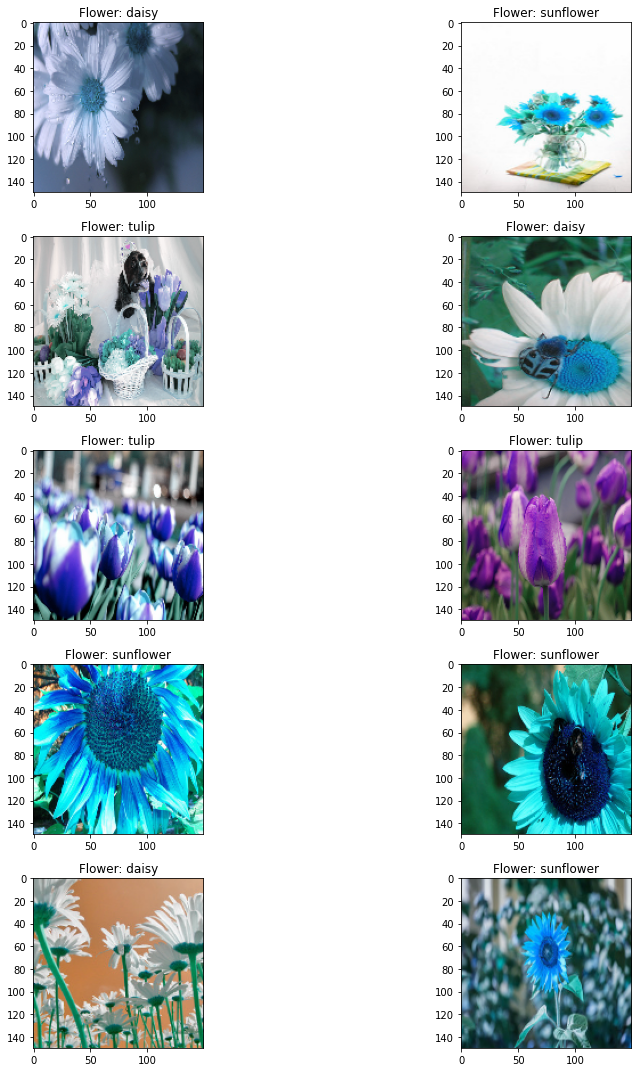

In [2]:
import matplotlib.pyplot as plt # 导入matplotlib
import random as rdm # 导入随机数工具
# 随机显示几张漂亮的花朵图片吧
fig,ax=plt.subplots(5,2) #画布
fig.set_size_inches(15,15) #大小
for i in range(5):
    for j in range (2):
        r=rdm.randint(0,len(X)) #随机选择图片
        ax[i,j].imshow(X[r]) #显示图片
        ax[i,j].set_title('Flower: '+y_label[r]) #花的类别
plt.tight_layout() #绘图

In [3]:
from sklearn.preprocessing import LabelEncoder # 导入标签编码工具
from tensorflow.keras.utils import to_categorical # 导入One-hot编码工具
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label) # 标签编码
y = to_categorical(y,4) # 将标签转换为One-hot编码
X = np.array(X) # 将X从列表转换为张量数组

2021-09-19 09:20:31.723349: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [4]:
y #看一看y张量什么样，这是分类标签

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [5]:
X = X/255 # 将X张量归一化

In [6]:
from sklearn.model_selection import train_test_split # 导入拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y, #拆分数据集
                             test_size=0.2,random_state=1)

In [7]:
from tensorflow.keras import layers # 导入所有层 行1
from tensorflow.keras import models # 导入所有模型 行2
cnn = models.Sequential() # 贯序模型 行3
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 输入卷积层 行4
                        input_shape=(150, 150, 3))) 
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行5
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷积层 行6
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行7
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积层 行8
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行9
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积层 行10
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行11
cnn.add(layers.Flatten()) # 展平层 行12
cnn.add(layers.Dense(512, activation='relu')) # 全连接层 行13
cnn.add(layers.Dense(4, activation='softmax')) # 分类输出层 行14
cnn.compile(loss='categorical_crossentropy', # 损失函数 行15
            optimizer='RMSprop', # 优化器
            metrics=['acc']) # 评估指标

2021-09-19 09:20:36.726338: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-19 09:20:36.729791: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-19 09:20:36.768973: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 09:20:36.769603: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-19 09:20:36.769681: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-19 09:20:36.802779: I tensorflow/stream_executor/platform/def

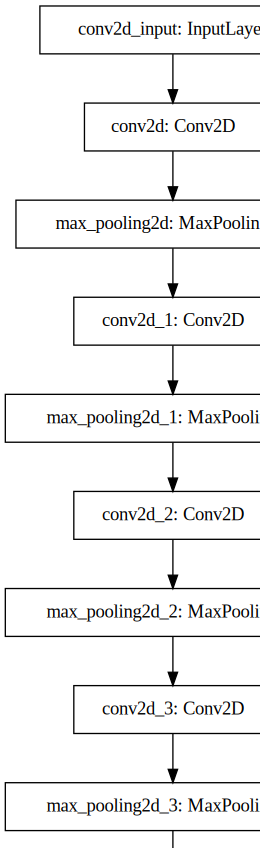

In [8]:
from IPython.display import SVG # 实现神经网络结构的图形化显示
from tensorflow.keras.utils import model_to_dot # 导入model_to_dot工具
SVG(model_to_dot(cnn).create(prog='dot', format='svg')) # 绘图

In [9]:
# 训练网络并把训练过程信息存入history对象
history = cnn.fit(X_train,y_train, #训练数据
                  epochs=10, #训练轮次（梯度下降）
                  validation_split=0.2) #训练的同时进行验证

2021-09-19 09:20:40.289393: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-19 09:20:40.300588: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000155000 Hz


Epoch 1/10


2021-09-19 09:20:41.061400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-19 09:20:41.869134: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-19 09:20:41.892931: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


66/66 [==============================] - 9s 34ms/step - loss: 1.3677 - acc: 0.3706 - val_loss: 1.1549 - val_acc: 0.4665
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.9952 - acc: 0.5669 - val_loss: 0.9322 - val_acc: 0.6214
Epoch 3/10
66/66 [==============================] - 1s 19ms/step - loss: 0.9015 - acc: 0.6273 - val_loss: 1.1398 - val_acc: 0.5488
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.8386 - acc: 0.6655 - val_loss: 1.3003 - val_acc: 0.5392
Epoch 5/10
66/66 [==============================] - 1s 19ms/step - loss: 0.7328 - acc: 0.7090 - val_loss: 0.8553 - val_acc: 0.6214
Epoch 6/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6047 - acc: 0.7413 - val_loss: 0.8985 - val_acc: 0.6004
Epoch 7/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5233 - acc: 0.7855 - val_loss: 0.9051 - val_acc: 0.6826
Epoch 8/10
66/66 [==============================] - 1s 20ms/step - loss: 0.3758 - acc: 0.8486 

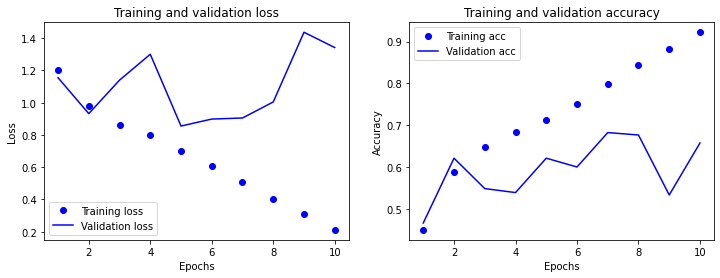

In [10]:
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss'] #训练损失
    val_loss = history.history['val_loss'] #验证损失
    epochs = range(1, len(loss) + 1) #训练轮次
    plt.figure(figsize=(12,4)) # 图片大小
    plt.subplot(1, 2, 1) #子图1
    plt.plot(epochs, loss, 'bo', label='Training loss') #训练损失
    plt.plot(epochs, val_loss, 'b', label='Validation loss') #验证损失
    plt.title('Training and validation loss') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Loss') #Y轴文字
    plt.legend() #图例
    acc = history.history['acc'] #训练准确率
    val_acc = history.history['val_acc'] #验证准确率
    plt.subplot(1, 2, 2) #子图2
    plt.plot(epochs, acc, 'bo', label='Training acc') #训练准确率
    plt.plot(epochs, val_acc, 'b', label='Validation acc') #验证准确率
    plt.title('Training and validation accuracy') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Accuracy') #Y轴文字
    plt.legend() #图例
    plt.show() #绘图
show_history(history) # 调用这个函数

In [11]:
result = cnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('CNN的测试准确率为',"{0:.2f}%".format(result[1]))

21/21 [==============================] - 0s 11ms/step - loss: 1.2853 - acc: 0.6616
CNN的测试准确率为 0.66%


In [12]:
prediction = cnn.predict(X_test) #预测测试集的图片分类

In [13]:
prediction[0] #第一张图片的分类

array([2.0290585e-05, 2.8712624e-03, 1.1445649e-02, 9.8566276e-01],
      dtype=float32)

In [14]:
print('第一张测试图片的分类结果为:', np.argmax(prediction[0]))

第一张测试图片的分类结果为: 3
